In [1]:
import xarray as xr
import os

In [2]:
folder = "../../../_data/p-dengue/weather_statistics-(derived-era5-single-levels-daily-statistics)/daily_mean_t2m"
files = [f for f in os.listdir(folder) if f.endswith(".nc")]
files.sort()
files

['daily_mean_t2m_2015.nc',
 'daily_mean_t2m_2016.nc',
 'daily_mean_t2m_2017.nc',
 'daily_mean_t2m_2018.nc',
 'daily_mean_t2m_2019.nc',
 'daily_mean_t2m_2020.nc',
 'daily_mean_t2m_2021.nc',
 'daily_mean_t2m_2022.nc',
 'daily_mean_t2m_2023.nc',
 'daily_mean_t2m_2024.nc']

In [3]:
file_path = os.path.join(folder, files[0])  # pick the first file
ds = xr.open_dataset(file_path)

In [4]:
ds

<xarray.Dataset> Size: 18MB
Dimensions:     (valid_time: 365, latitude: 68, longitude: 184)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 3kB 2015-01-01 ... 2015-12-31
  * latitude    (latitude) float64 544B 5.842 5.592 5.342 ... -10.66 -10.91
  * longitude   (longitude) float64 1kB 95.11 95.36 95.61 ... 140.4 140.6 140.9
    number      int64 8B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 18MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-10T03:41 GRIB to CDM+CF via cfgrib-0.9.1...

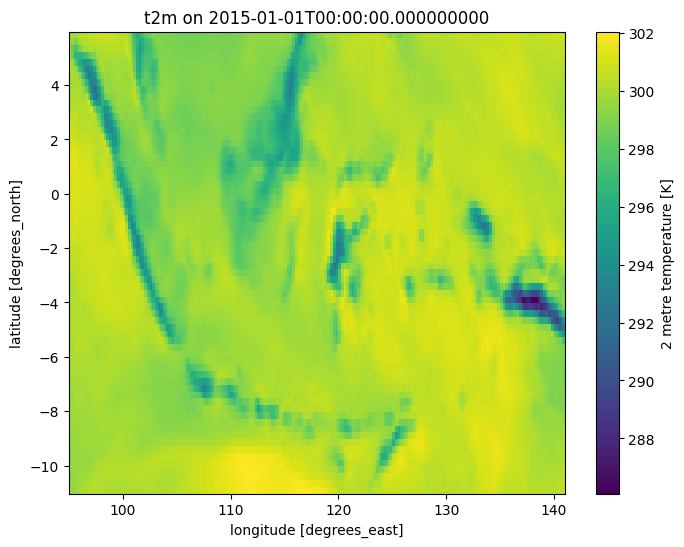

In [5]:
import matplotlib.pyplot as plt
var_name = list(ds.data_vars)[0]
# Select the first time step
data = ds[var_name].isel(valid_time=0)

plt.figure(figsize=(8,6))
data.plot()
plt.title(f"{var_name} on {str(ds['valid_time'].values[0])}")
plt.show()